In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sys

In [2]:
data= pd.read_csv("../5_OutputData/OUTPUT.csv")
data.sample(8)

,battery_power,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,three_g,touch_screen,price_range
826,0.859719,0.000000,0.583333,1.00,0.240816,0.382510,0.641101,0.500000,0.111111,1.0,0.0,2
792,0.765531,0.580645,0.183333,0.75,0.098469,0.457276,0.608231,0.785714,0.777778,1.0,0.0,2
140,0.836339,0.467742,0.450000,0.90,0.811224,0.951936,0.285409,0.857143,0.000000,1.0,0.0,2
1525,0.678691,0.096774,0.741667,0.90,0.290816,0.764352,0.663282,0.928571,0.888889,1.0,0.0,2
1416,0.632599,0.000000,0.166667,0.95,0.431633,0.429907,0.090059,0.285714,0.222222,1.0,1.0,0
823,0.729459,0.806452,0.416667,0.00,0.388265,0.558077,0.293426,0.714286,0.722222,1.0,1.0,1
65,0.076820,0.677419,0.008333,0.85,0.332143,0.746328,0.831106,0.928571,0.444444,1.0,1.0,3
1847,0.790915,0.225806,0.475000,0.75,0.061224,0.620160,0.167023,0.071429,0.166667,0.0,1.0,0


In [3]:
print(data.columns[data.isna().any()].tolist())

[]


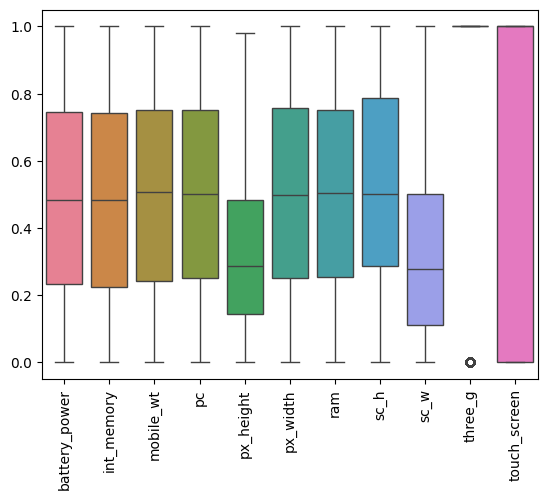

In [4]:
dataInd=data.drop("price_range",axis=1)
sys.boxplot(dataInd)
plt.title("")
plt.xticks(rotation=90)
plt.show()

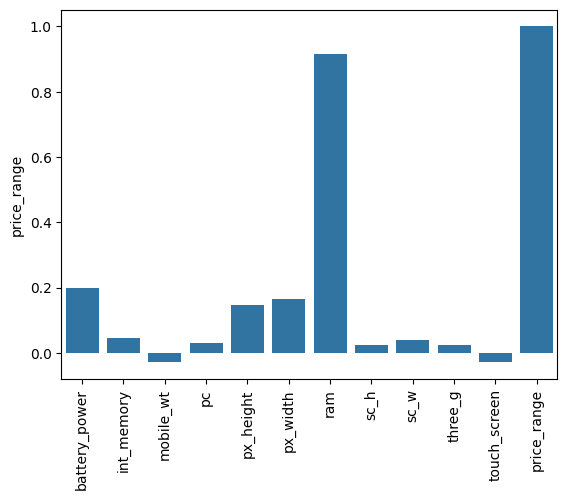

In [5]:
coeere=data.corr()['price_range']
sys.barplot(coeere)
plt.xticks(rotation=90)
plt.show()

### Divide datasets into training and testing subsets

In [6]:
from sklearn.model_selection import train_test_split
X=data.drop("price_range",axis=1)
y=data.price_range
X_tr, X_te, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_tr

,battery_power,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,three_g,touch_screen
81,0.332665,1.000000,0.991667,0.95,0.712755,0.744993,0.624532,0.642857,0.611111,1.0,1.0
1617,0.088844,0.629032,0.933333,0.60,0.694898,0.903204,0.797969,0.928571,0.611111,1.0,0.0
1392,0.791583,0.419355,0.850000,0.40,0.305612,0.382510,0.140032,0.428571,0.555556,0.0,0.0
380,0.917168,0.096774,0.716667,0.65,0.491837,0.489319,0.264564,0.214286,0.055556,0.0,0.0
1320,0.692719,0.177419,0.341667,0.35,0.289286,0.324433,0.330839,0.928571,0.555556,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1130,0.984636,0.467742,0.591667,0.85,0.395408,0.738985,0.739177,0.571429,0.277778,0.0,0.0
1294,0.058784,0.919355,0.550000,0.20,0.387245,0.906542,0.028327,0.785714,0.555556,1.0,1.0
860,0.887108,0.209677,0.666667,0.35,0.371939,0.512016,0.487440,0.785714,0.611111,1.0,0.0
1459,0.952572,0.145161,0.916667,0.60,0.250510,0.671562,0.710850,0.785714,0.611111,0.0,1.0


### Standardize the input data

In [7]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler().fit(X_tr)
X_train =ss.transform(X_tr)
X_test =ss.transform(X_te)
X_train

array([[-0.5301013 ,  1.71863467,  1.68318968, ...,  1.23572494,
         0.54984141,  0.98816526],
       [-1.35877514,  0.46414268,  1.48500559, ...,  1.23572494,
         0.54984141, -1.01197647],
       [ 1.02962179, -0.24491801,  1.20188545, ...,  1.00399418,
        -1.81870622, -1.01197647],
       ...,
       [ 1.35428031, -0.9539787 ,  0.57902114, ...,  1.23572494,
         0.54984141, -1.01197647],
       [ 1.57677356, -1.17215122,  1.42838156, ...,  1.23572494,
        -1.81870622,  0.98816526],
       [-1.3565048 ,  0.95503085, -1.20463573, ...,  1.46745569,
         0.54984141, -1.01197647]], shape=(1344, 11))

# MODEL BULDING

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay,r2_score
from sklearn.model_selection import GridSearchCV


In [9]:
accuracyList=[]

## Logistic Regression

Accuracy: 0.9682779456193353

Confusion Matrix:
 [[163   4   0   0]
 [  0 141   3   0]
 [  0   8 169   3]
 [  0   1   2 168]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       167
           1       0.92      0.98      0.95       144
           2       0.97      0.94      0.95       180
           3       0.98      0.98      0.98       171

    accuracy                           0.97       662
   macro avg       0.97      0.97      0.97       662
weighted avg       0.97      0.97      0.97       662


Confusion Matrix Plot:



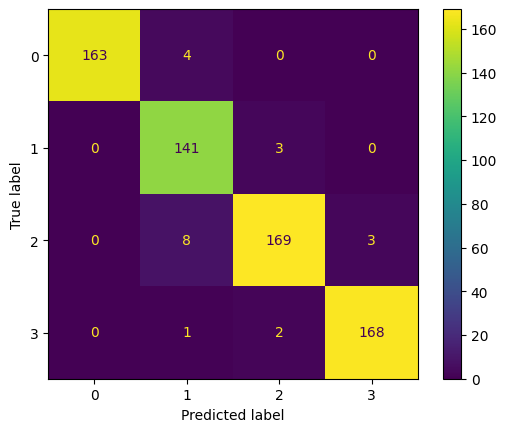

[['Logistic Regression', 0.9682779456193353]]

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions,labels=model.classes_)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, predictions))
print("\nConfusion Matrix Plot:\n")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=model.classes_)
disp.plot()
plt.show()
accuracyList.append(['Logistic Regression',accuracy])
accuracyList

### Hyperparameter Tuned Logistic Regression

In [11]:
param={
    'penalty':['l1', 'l2', 'elasticnet', None],
    'solver':['lbfgs', 'liblinear', 'newton-cg'],
    'max_iter':[10,50,100,1000],
    'C':[1,5,10]
}
grid=GridSearchCV(model,param_grid=param,cv=5,scoring='accuracy')
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10], 'max_iter': [10, 50, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']},
             scoring='accuracy')

In [12]:
grid.best_params_

{'C': 1, 'max_iter': 50, 'penalty': None, 'solver': 'newton-cg'}

Accuracy: 0.974320241691843

Confusion Matrix:
 [[165   2   0   0]
 [  0 142   2   0]
 [  0   7 170   3]
 [  0   1   2 168]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       167
           1       0.93      0.99      0.96       144
           2       0.98      0.94      0.96       180
           3       0.98      0.98      0.98       171

    accuracy                           0.97       662
   macro avg       0.97      0.98      0.97       662
weighted avg       0.97      0.97      0.97       662


Confusion Matrix Plot:



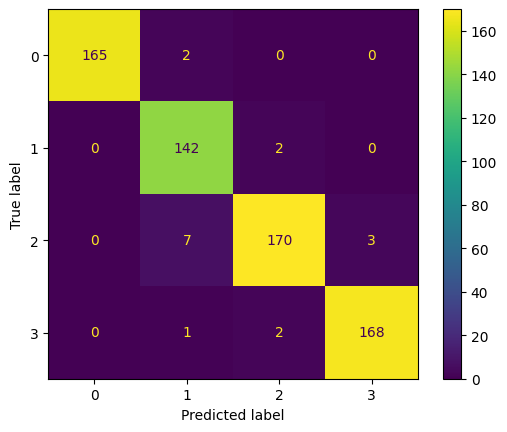

[['Logistic Regression', 0.9682779456193353],
 ['Logistic Regression Tuning', 0.974320241691843]]

In [13]:
predictions=grid.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions,labels=grid.classes_)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, predictions))

print("\nConfusion Matrix Plot:\n")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=grid.classes_)
disp.plot()
plt.show()
accuracyList.append(['Logistic Regression Tuning',accuracy])
accuracyList

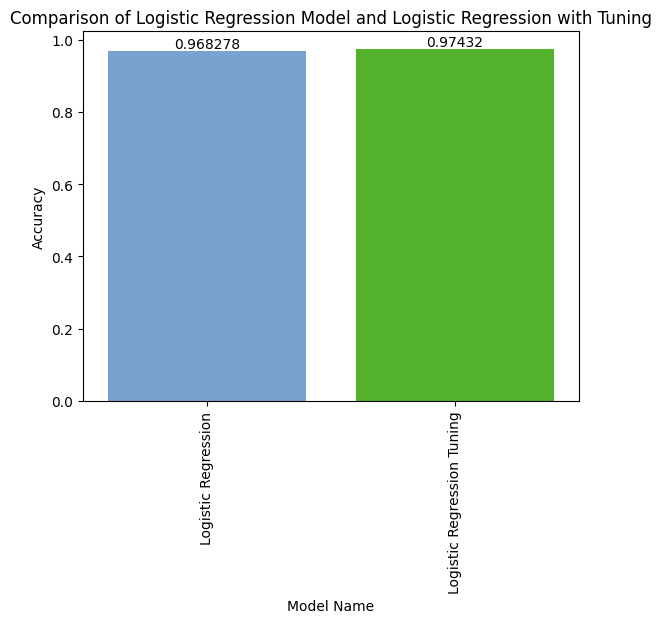

In [14]:
df=pd.DataFrame(accuracyList[:2],columns=['Model Name','Accuracy'])
df=df.sort_values(by='Accuracy')
df
p=["#6aa2de","#4bc716"]
plt.title("Comparison of Logistic Regression Model and Logistic Regression with Tuning")
ax=sys.barplot(x=df['Model Name'],y=df['Accuracy'],palette =p)
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i, fontsize=10)


## DecisionTreeClassifier

Accuracy: 0.8308157099697885

Confusion Matrix:
 [[153  14   0   0]
 [ 15 113  16   0]
 [  1  21 135  23]
 [  0   0  22 149]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       167
           1       0.76      0.78      0.77       144
           2       0.78      0.75      0.76       180
           3       0.87      0.87      0.87       171

    accuracy                           0.83       662
   macro avg       0.83      0.83      0.83       662
weighted avg       0.83      0.83      0.83       662


Confusion Matrix Plot:



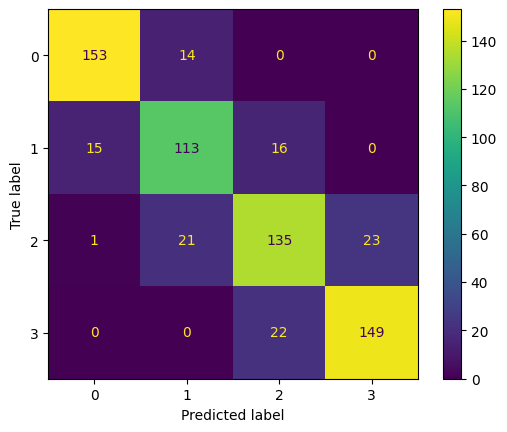

[['Logistic Regression', 0.9682779456193353],
 ['Logistic Regression Tuning', 0.974320241691843],
 ['Decision Tree Classifier', 0.8308157099697885]]

In [15]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions,labels=model.classes_)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, predictions))
print("\nConfusion Matrix Plot:\n")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=model.classes_)
disp.plot()
plt.show()
accuracyList.append(['Decision Tree Classifier',accuracy])
accuracyList 

### Decision Tree Classifier With Tuning

In [16]:
 
param={
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[3,4,5,8,10,12,14,18,20,None],
    'max_features':['auto','sqrt','log2']
}
grid=GridSearchCV(model,param_grid=param,cv=5,scoring='accuracy')
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 8, 10, 12, 14, 18, 20, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [17]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 18,
 'max_features': 'sqrt',
 'splitter': 'best'}

Accuracy: 0.7688821752265861

Confusion Matrix:
 [[147  19   1   0]
 [ 18 106  18   2]
 [  1  30 108  41]
 [  0   0  23 148]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88       167
           1       0.68      0.74      0.71       144
           2       0.72      0.60      0.65       180
           3       0.77      0.87      0.82       171

    accuracy                           0.77       662
   macro avg       0.77      0.77      0.77       662
weighted avg       0.77      0.77      0.77       662


Confusion Matrix Plot:



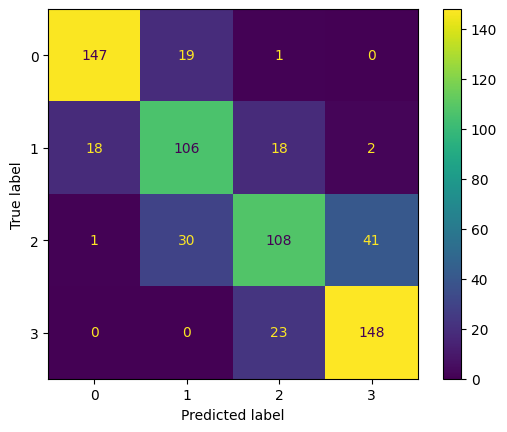

[['Logistic Regression', 0.9682779456193353],
 ['Logistic Regression Tuning', 0.974320241691843],
 ['Decision Tree Classifier', 0.8308157099697885],
 ['Decision Tree Classifier With Tuning', 0.7688821752265861]]

In [18]:
predictions=grid.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions,labels=grid.classes_)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, predictions))
print("\nConfusion Matrix Plot:\n")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=grid.classes_)
disp.plot()
plt.show()
accuracyList.append(['Decision Tree Classifier With Tuning',accuracy])
accuracyList 

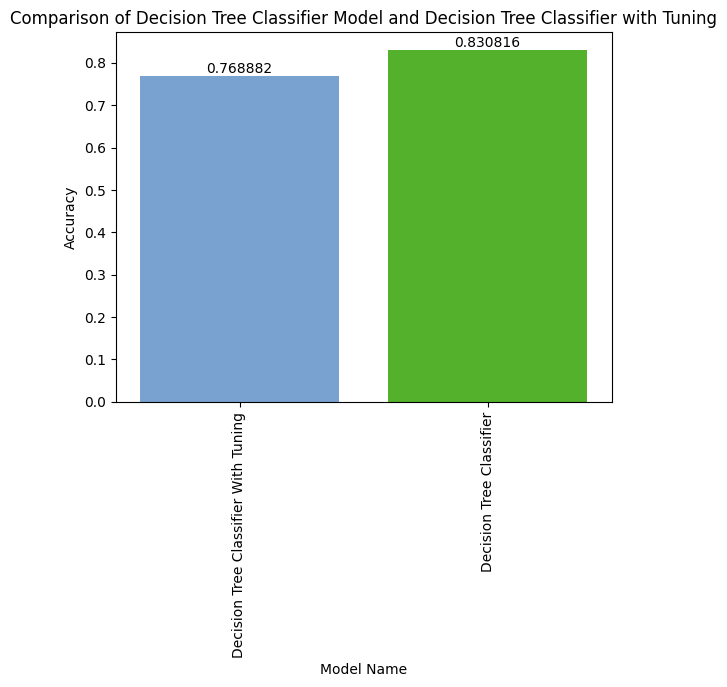

In [19]:
df=pd.DataFrame(accuracyList[2:4],columns=['Model Name','Accuracy'])
df=df.sort_values(by='Accuracy')
df
p=["#6aa2de","#4bc716"]
plt.title("Comparison of Decision Tree Classifier Model and Decision Tree Classifier with Tuning")
ax=sys.barplot(x=df['Model Name'],y=df['Accuracy'],palette =p)
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i, fontsize=10)

## Random Forests 

Accuracy: 0.9033232628398792

Confusion Matrix:
 [[160   7   0   0]
 [  8 132   4   0]
 [  0  15 149  16]
 [  0   0  14 157]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       167
           1       0.86      0.92      0.89       144
           2       0.89      0.83      0.86       180
           3       0.91      0.92      0.91       171

    accuracy                           0.90       662
   macro avg       0.90      0.91      0.90       662
weighted avg       0.90      0.90      0.90       662


Confusion Matrix Plot:



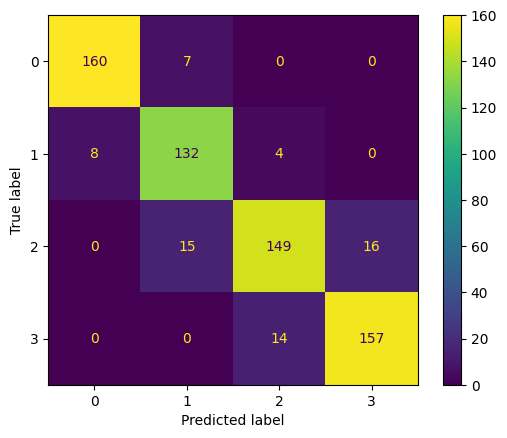

[['Logistic Regression', 0.9682779456193353],
 ['Logistic Regression Tuning', 0.974320241691843],
 ['Decision Tree Classifier', 0.8308157099697885],
 ['Decision Tree Classifier With Tuning', 0.7688821752265861],
 ['Random Forest Classifier', 0.9033232628398792]]

In [20]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions,labels=model.classes_)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, predictions))
print("\nConfusion Matrix Plot:\n")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=model.classes_)
disp.plot()
plt.show()
accuracyList.append(['Random Forest Classifier',accuracy])
accuracyList 

### Random Forests Classifier With Tuning

In [21]:
param={
    'criterion':['gini','entropy'],
    'n_estimators':[10,50,100,200],
    'max_depth':[3,4,5,8,10,12,14,18,20,None],
    'max_features':['auto','sqrt','log2']
}
grid=GridSearchCV(model,param_grid=param,cv=5,scoring='accuracy')
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 8, 10, 12, 14, 18, 20, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [22]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'sqrt',
 'n_estimators': 200}

Accuracy: 0.9199395770392749

Confusion Matrix:
 [[161   6   0   0]
 [  6 135   3   0]
 [  0  13 154  13]
 [  0   0  12 159]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       167
           1       0.88      0.94      0.91       144
           2       0.91      0.86      0.88       180
           3       0.92      0.93      0.93       171

    accuracy                           0.92       662
   macro avg       0.92      0.92      0.92       662
weighted avg       0.92      0.92      0.92       662


Confusion Matrix Plot:



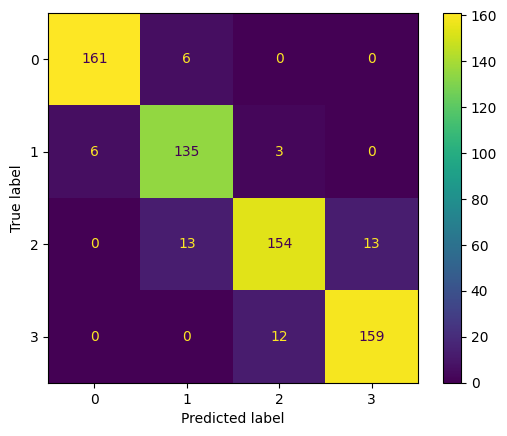

[['Logistic Regression', 0.9682779456193353],
 ['Logistic Regression Tuning', 0.974320241691843],
 ['Decision Tree Classifier', 0.8308157099697885],
 ['Decision Tree Classifier With Tuning', 0.7688821752265861],
 ['Random Forest Classifier', 0.9033232628398792],
 ['Random Forests Classifier With Tuning', 0.9199395770392749]]

In [23]:
predictions=grid.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions,labels=grid.classes_)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, predictions))
print("\nConfusion Matrix Plot:\n")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=grid.classes_)
disp.plot()
plt.show()
accuracyList.append(['Random Forests Classifier With Tuning',accuracy])
accuracyList 

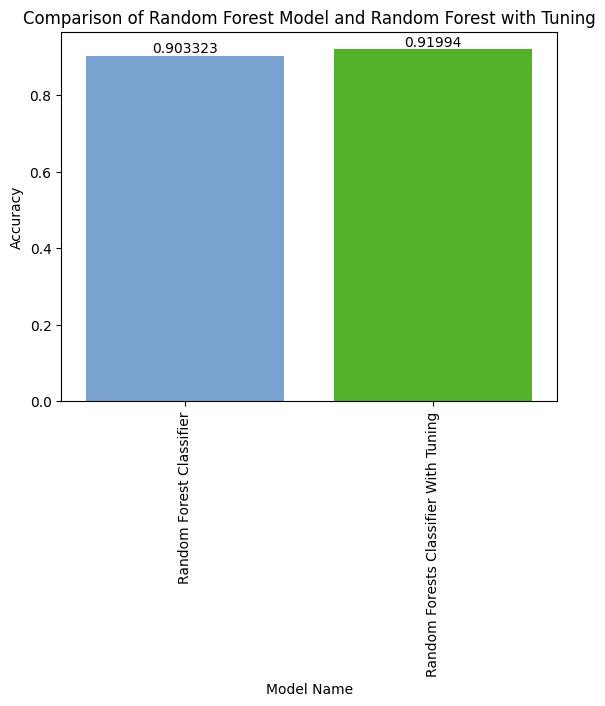

In [24]:
df=pd.DataFrame(accuracyList[4:6],columns=['Model Name','Accuracy'])
df=df.sort_values(by='Accuracy')
df
p=["#6aa2de","#4bc716"]
plt.title("Comparison of Random Forest Model and Random Forest with Tuning")
ax=sys.barplot(x=df['Model Name'],y=df['Accuracy'],palette =p)
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i, fontsize=10)

## Support Vector Machine (SVM)

Accuracy: 0.8867069486404834

Confusion Matrix:
 [[159   8   0   0]
 [  7 129   8   0]
 [  0  20 147  13]
 [  0   1  18 152]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       167
           1       0.82      0.90      0.85       144
           2       0.85      0.82      0.83       180
           3       0.92      0.89      0.90       171

    accuracy                           0.89       662
   macro avg       0.89      0.89      0.89       662
weighted avg       0.89      0.89      0.89       662


Confusion Matrix Plot:



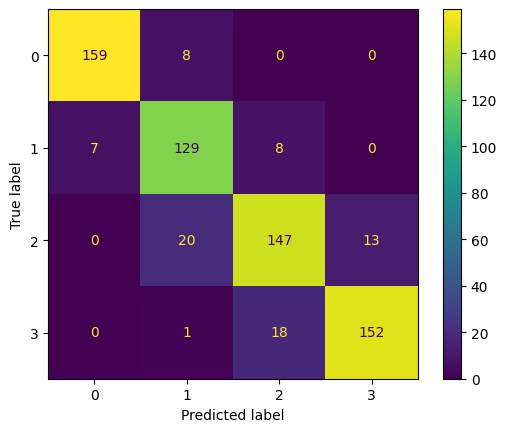

[['Logistic Regression', 0.9682779456193353],
 ['Logistic Regression Tuning', 0.974320241691843],
 ['Decision Tree Classifier', 0.8308157099697885],
 ['Decision Tree Classifier With Tuning', 0.7688821752265861],
 ['Random Forest Classifier', 0.9033232628398792],
 ['Random Forests Classifier With Tuning', 0.9199395770392749],
 ['Support Vector Classifier', 0.8867069486404834]]

In [25]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions,labels=model.classes_)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, predictions))
print("\nConfusion Matrix Plot:\n")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=model.classes_)
disp.plot()
plt.show()
accuracyList.append(['Support Vector Classifier',accuracy])
accuracyList 

### Support Vector Machine (SVM) With Tuning

In [26]:
 
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
             }
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)
grid.fit(X_train,y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.955 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.955 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.963 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.922 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.940 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.799 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.766 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.740 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.792 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.780 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.264 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [27]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

Accuracy: 0.9712990936555891

Confusion Matrix:
 [[165   2   0   0]
 [  0 140   4   0]
 [  0   8 170   2]
 [  0   1   2 168]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       167
           1       0.93      0.97      0.95       144
           2       0.97      0.94      0.96       180
           3       0.99      0.98      0.99       171

    accuracy                           0.97       662
   macro avg       0.97      0.97      0.97       662
weighted avg       0.97      0.97      0.97       662


Confusion Matrix Plot:



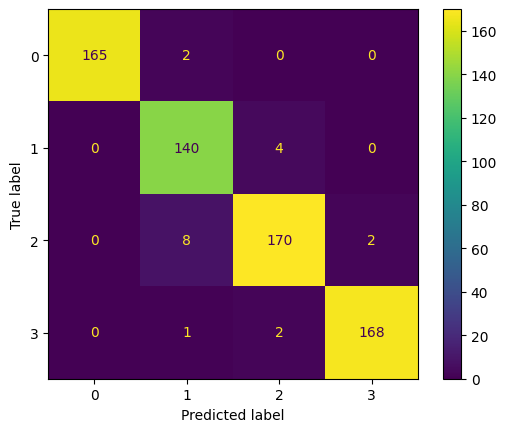

[['Logistic Regression', 0.9682779456193353],
 ['Logistic Regression Tuning', 0.974320241691843],
 ['Decision Tree Classifier', 0.8308157099697885],
 ['Decision Tree Classifier With Tuning', 0.7688821752265861],
 ['Random Forest Classifier', 0.9033232628398792],
 ['Random Forests Classifier With Tuning', 0.9199395770392749],
 ['Support Vector Classifier', 0.8867069486404834],
 ['SVC With Tuning', 0.9712990936555891]]

In [28]:
predictions=grid.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions,labels=grid.classes_)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, predictions))
print("\nConfusion Matrix Plot:\n")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=grid.classes_)
disp.plot()
plt.show()
accuracyList.append(['SVC With Tuning',accuracy])
accuracyList 

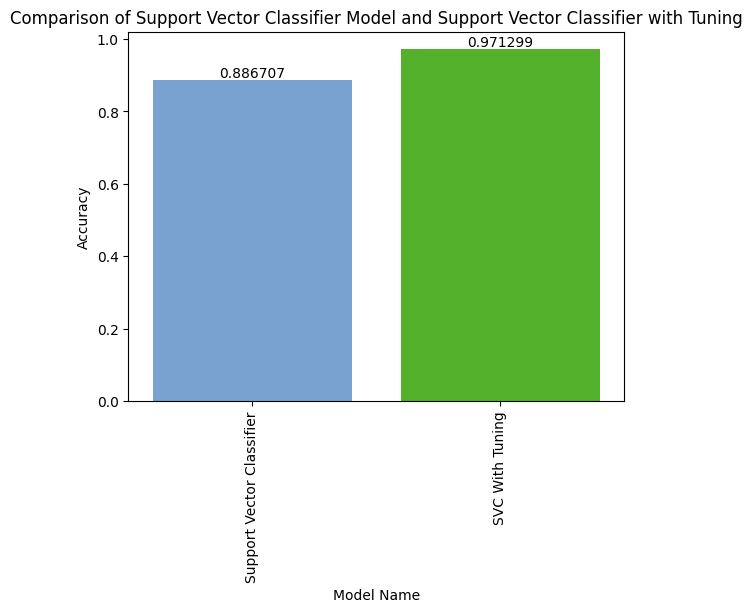

In [29]:
df=pd.DataFrame(accuracyList[6:8],columns=['Model Name','Accuracy'])
df=df.sort_values(by='Accuracy')
df
p=["#6aa2de","#4bc716"]
plt.title("Comparison of Support Vector Classifier Model and Support Vector Classifier with Tuning")
ax=sys.barplot(x=df['Model Name'],y=df['Accuracy'],palette =p)
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i, fontsize=10)

## K-Nearest Neighbors (KNN) 

Accuracy: 0.6404833836858006

Confusion Matrix:
 [[134  32   1   0]
 [ 36  79  29   0]
 [  3  54  95  28]
 [  0   8  47 116]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.80      0.79       167
           1       0.46      0.55      0.50       144
           2       0.55      0.53      0.54       180
           3       0.81      0.68      0.74       171

    accuracy                           0.64       662
   macro avg       0.65      0.64      0.64       662
weighted avg       0.65      0.64      0.64       662


Confusion Matrix Plot:



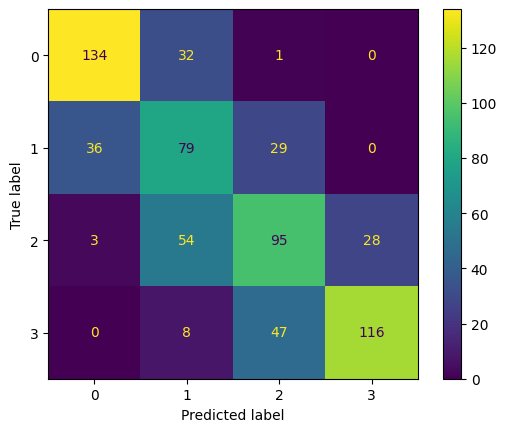

[['Logistic Regression', 0.9682779456193353],
 ['Logistic Regression Tuning', 0.974320241691843],
 ['Decision Tree Classifier', 0.8308157099697885],
 ['Decision Tree Classifier With Tuning', 0.7688821752265861],
 ['Random Forest Classifier', 0.9033232628398792],
 ['Random Forests Classifier With Tuning', 0.9199395770392749],
 ['Support Vector Classifier', 0.8867069486404834],
 ['SVC With Tuning', 0.9712990936555891],
 ['KNeighbors Classifier', 0.6404833836858006]]

In [30]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions,labels=model.classes_)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, predictions))
print("\nConfusion Matrix Plot:\n")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=model.classes_)
disp.plot()
plt.show()
accuracyList.append(['KNeighbors Classifier',accuracy])
accuracyList 

### K-Nearest Neighbors (KNN) With Tuning

In [31]:
 
param_grid = {'n_neighbors': [1, 10,20],
              'leaf_size': [20, 30, 50],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2,3],
              'weights': ['uniform', 'distance']
             }
grid=GridSearchCV(model,param_grid=param_grid,refit=True,cv=5,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5] END algorithm=auto, leaf_size=20, n_neighbors=1, p=1, weights=uniform;, score=0.558 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, n_neighbors=1, p=1, weights=uniform;, score=0.591 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, n_neighbors=1, p=1, weights=uniform;, score=0.625 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, n_neighbors=1, p=1, weights=uniform;, score=0.543 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, n_neighbors=1, p=1, weights=uniform;, score=0.593 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, n_neighbors=1, p=1, weights=distance;, score=0.558 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, n_neighbors=1, p=1, weights=distance;, score=0.591 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, n_neighbors=1, p=1, weights=distance;, score=0.625 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_siz

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=10),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 50], 'n_neighbors': [1, 10, 20],
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']},
             verbose=3)

In [32]:
grid.best_params_

{'algorithm': 'auto',
 'leaf_size': 20,
 'n_neighbors': 20,
 'p': 1,
 'weights': 'distance'}

Accuracy: 0.7673716012084593

Confusion Matrix:
 [[145  22   0   0]
 [ 15 105  24   0]
 [  0  37 114  29]
 [  0   2  25 144]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       167
           1       0.63      0.73      0.68       144
           2       0.70      0.63      0.66       180
           3       0.83      0.84      0.84       171

    accuracy                           0.77       662
   macro avg       0.77      0.77      0.77       662
weighted avg       0.77      0.77      0.77       662


Confusion Matrix Plot:



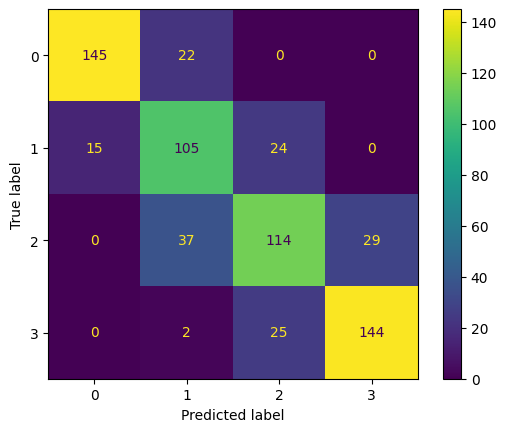

[['Logistic Regression', 0.9682779456193353],
 ['Logistic Regression Tuning', 0.974320241691843],
 ['Decision Tree Classifier', 0.8308157099697885],
 ['Decision Tree Classifier With Tuning', 0.7688821752265861],
 ['Random Forest Classifier', 0.9033232628398792],
 ['Random Forests Classifier With Tuning', 0.9199395770392749],
 ['Support Vector Classifier', 0.8867069486404834],
 ['SVC With Tuning', 0.9712990936555891],
 ['KNeighbors Classifier', 0.6404833836858006],
 ['KNN With Tuning', 0.7673716012084593]]

In [33]:
predictions=grid.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions,labels=grid.classes_)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, predictions))
print("\nConfusion Matrix Plot:\n")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=grid.classes_)
disp.plot()
plt.show()
accuracyList.append(['KNN With Tuning',accuracy])
accuracyList 

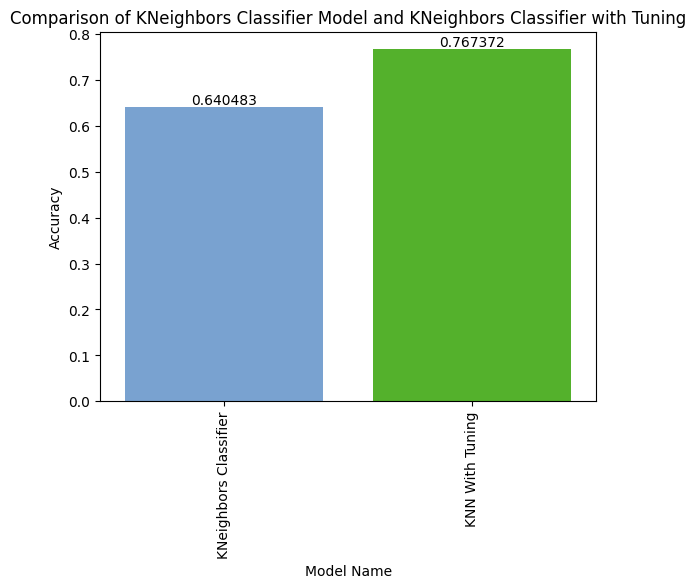

In [34]:
df=pd.DataFrame(accuracyList[8:10],columns=['Model Name','Accuracy'])
df=df.sort_values(by='Accuracy')
df
p=["#6aa2de","#4bc716"]
plt.title("Comparison of KNeighbors Classifier Model and KNeighbors Classifier with Tuning")
ax=sys.barplot(x=df['Model Name'],y=df['Accuracy'],palette =p)
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i, fontsize=10)

## Gradient Boosting

Accuracy: 0.8972809667673716

Confusion Matrix:
 [[158   9   0   0]
 [  8 130   6   0]
 [  0  16 150  14]
 [  0   0  15 156]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       167
           1       0.84      0.90      0.87       144
           2       0.88      0.83      0.85       180
           3       0.92      0.91      0.91       171

    accuracy                           0.90       662
   macro avg       0.90      0.90      0.90       662
weighted avg       0.90      0.90      0.90       662


Confusion Matrix Plot:



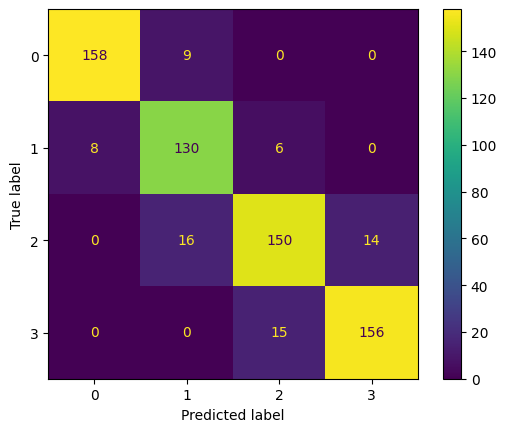

[['Logistic Regression', 0.9682779456193353],
 ['Logistic Regression Tuning', 0.974320241691843],
 ['Decision Tree Classifier', 0.8308157099697885],
 ['Decision Tree Classifier With Tuning', 0.7688821752265861],
 ['Random Forest Classifier', 0.9033232628398792],
 ['Random Forests Classifier With Tuning', 0.9199395770392749],
 ['Support Vector Classifier', 0.8867069486404834],
 ['SVC With Tuning', 0.9712990936555891],
 ['KNeighbors Classifier', 0.6404833836858006],
 ['KNN With Tuning', 0.7673716012084593],
 ['Gradient Boosting Classifier', 0.8972809667673716]]

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions,labels=model.classes_)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, predictions))
print("\nConfusion Matrix Plot:\n")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=model.classes_)
disp.plot()
plt.show()
accuracyList.append(['Gradient Boosting Classifier',accuracy])
accuracyList 

### Gradient Boosting with Tuning

In [36]:
param_grid = {'n_estimators': [10,100,200],
              'learning_rate': [1, 0.1, 0.01,0.001],
              'loss': ['log_loss', 'exponential'],
              'min_samples_split': [1, 2,3],
              'criterion': ['friedman_mse', 'squared_error']
             }
grid=GridSearchCV(model,param_grid=param_grid,refit=True,cv=5,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END criterion=friedman_mse, learning_rate=1, loss=log_loss, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END criterion=friedman_mse, learning_rate=1, loss=log_loss, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END criterion=friedman_mse, learning_rate=1, loss=log_loss, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END criterion=friedman_mse, learning_rate=1, loss=log_loss, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END criterion=friedman_mse, learning_rate=1, loss=log_loss, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END criterion=friedman_mse, learning_rate=1, loss=log_loss, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=friedman_mse, learning_rate=1, loss=log_loss, min_samples_split=1, n_estimators=100;, score

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [1, 0.1, 0.01, 0.001],
                         'loss': ['log_loss', 'exponential'],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [10, 100, 200]},
             verbose=3)

In [37]:
grid.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'min_samples_split': 2,
 'n_estimators': 200}

Accuracy: 0.904833836858006

Confusion Matrix:
 [[159   8   0   0]
 [  7 133   4   0]
 [  0  16 151  13]
 [  0   0  15 156]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       167
           1       0.85      0.92      0.88       144
           2       0.89      0.84      0.86       180
           3       0.92      0.91      0.92       171

    accuracy                           0.90       662
   macro avg       0.90      0.91      0.90       662
weighted avg       0.91      0.90      0.90       662


Confusion Matrix Plot:



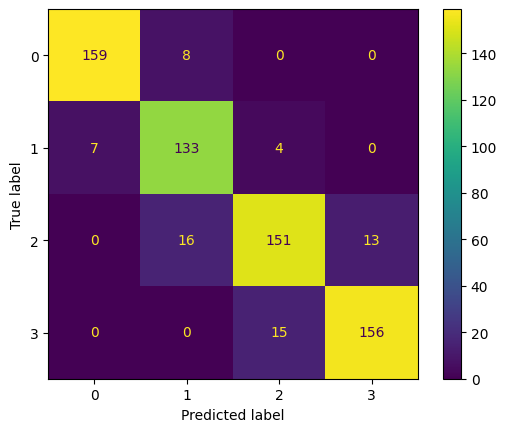

[['Logistic Regression', 0.9682779456193353],
 ['Logistic Regression Tuning', 0.974320241691843],
 ['Decision Tree Classifier', 0.8308157099697885],
 ['Decision Tree Classifier With Tuning', 0.7688821752265861],
 ['Random Forest Classifier', 0.9033232628398792],
 ['Random Forests Classifier With Tuning', 0.9199395770392749],
 ['Support Vector Classifier', 0.8867069486404834],
 ['SVC With Tuning', 0.9712990936555891],
 ['KNeighbors Classifier', 0.6404833836858006],
 ['KNN With Tuning', 0.7673716012084593],
 ['Gradient Boosting Classifier', 0.8972809667673716],
 ['Gradient Boosting With Tuning', 0.904833836858006]]

In [38]:
predictions=grid.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions,labels=grid.classes_)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, predictions))
print("\nConfusion Matrix Plot:\n")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=grid.classes_)
disp.plot()
plt.show()
accuracyList.append(['Gradient Boosting With Tuning',accuracy])
accuracyList 

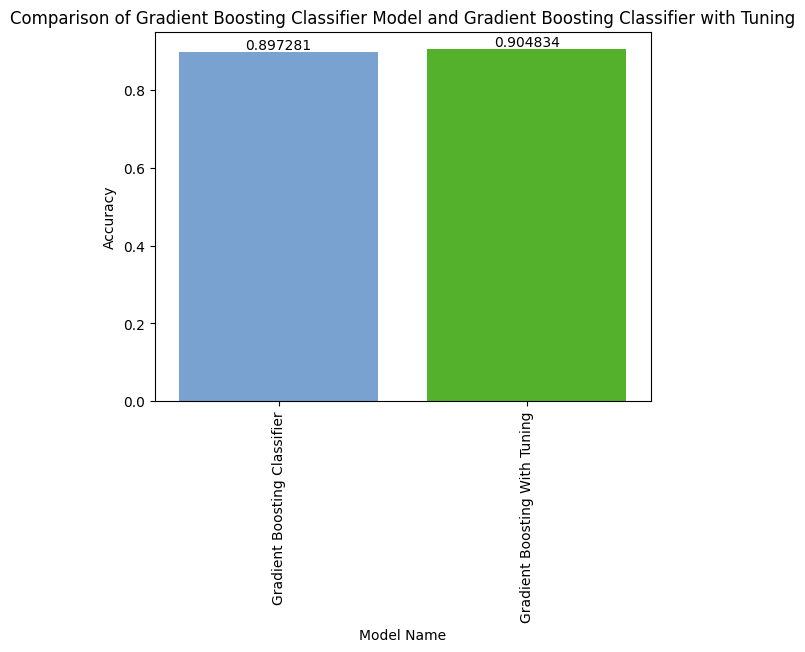

In [39]:
df=pd.DataFrame(accuracyList[10:12],columns=['Model Name','Accuracy'])
df=df.sort_values(by='Accuracy')
df
p=["#6aa2de","#4bc716"]
plt.title("Comparison of Gradient Boosting Classifier Model and Gradient Boosting Classifier with Tuning")
ax=sys.barplot(x=df['Model Name'],y=df['Accuracy'],palette =p)
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i, fontsize=10)

## AdaBoost Classifier

Accuracy: 0.5634441087613293

Confusion Matrix:
 [[130  37   0   0]
 [ 31 100  13   0]
 [  3  26 103  48]
 [  1   0 130  40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78       167
           1       0.61      0.69      0.65       144
           2       0.42      0.57      0.48       180
           3       0.45      0.23      0.31       171

    accuracy                           0.56       662
   macro avg       0.57      0.57      0.56       662
weighted avg       0.56      0.56      0.55       662


Confusion Matrix Plot:



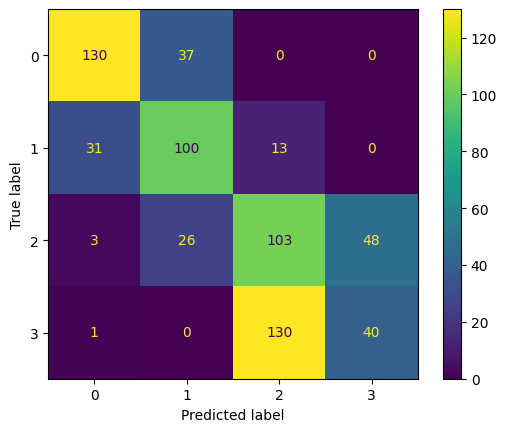

[['Logistic Regression', 0.9682779456193353],
 ['Logistic Regression Tuning', 0.974320241691843],
 ['Decision Tree Classifier', 0.8308157099697885],
 ['Decision Tree Classifier With Tuning', 0.7688821752265861],
 ['Random Forest Classifier', 0.9033232628398792],
 ['Random Forests Classifier With Tuning', 0.9199395770392749],
 ['Support Vector Classifier', 0.8867069486404834],
 ['SVC With Tuning', 0.9712990936555891],
 ['KNeighbors Classifier', 0.6404833836858006],
 ['KNN With Tuning', 0.7673716012084593],
 ['Gradient Boosting Classifier', 0.8972809667673716],
 ['Gradient Boosting With Tuning', 0.904833836858006],
 ['Ada Boost Classifier', 0.5634441087613293]]

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

weak_learner = DecisionTreeClassifier(max_depth=1)

model = AdaBoostClassifier(
    estimator=weak_learner
)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions,labels=model.classes_)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, predictions))
print("\nConfusion Matrix Plot:\n")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=model.classes_)
disp.plot()
plt.show()
accuracyList.append(['Ada Boost Classifier',accuracy])
accuracyList 

### AdaBoost Classifier with Tuning

In [41]:
param_grid = {'n_estimators': [10,50,100,200],
              'learning_rate': [1, 0.1, 0.01,0.001],
              'random_state':[40,45,50]
             }
grid=GridSearchCV(model,param_grid=param_grid,refit=True,cv=5,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END learning_rate=1, n_estimators=10, random_state=40;, score=0.636 total time=   0.0s
[CV 2/5] END learning_rate=1, n_estimators=10, random_state=40;, score=0.494 total time=   0.0s
[CV 3/5] END learning_rate=1, n_estimators=10, random_state=40;, score=0.706 total time=   0.0s
[CV 4/5] END learning_rate=1, n_estimators=10, random_state=40;, score=0.639 total time=   0.0s
[CV 5/5] END learning_rate=1, n_estimators=10, random_state=40;, score=0.552 total time=   0.0s
[CV 1/5] END learning_rate=1, n_estimators=10, random_state=45;, score=0.636 total time=   0.0s
[CV 2/5] END learning_rate=1, n_estimators=10, random_state=45;, score=0.494 total time=   0.0s
[CV 3/5] END learning_rate=1, n_estimators=10, random_state=45;, score=0.706 total time=   0.0s
[CV 4/5] END learning_rate=1, n_estimators=10, random_state=45;, score=0.639 total time=   0.0s
[CV 5/5] END learning_rate=1, n_estimators=10, random_state=45;, score=0.5

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1)),
             param_grid={'learning_rate': [1, 0.1, 0.01, 0.001],
                         'n_estimators': [10, 50, 100, 200],
                         'random_state': [40, 45, 50]},
             verbose=3)

In [42]:
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 200, 'random_state': 40}

Accuracy: 0.7401812688821753

Confusion Matrix:
 [[147  20   0   0]
 [ 27  90  27   0]
 [  2  24 101  53]
 [  0   1  18 152]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       167
           1       0.67      0.62      0.65       144
           2       0.69      0.56      0.62       180
           3       0.74      0.89      0.81       171

    accuracy                           0.74       662
   macro avg       0.73      0.74      0.73       662
weighted avg       0.74      0.74      0.73       662


Confusion Matrix Plot:



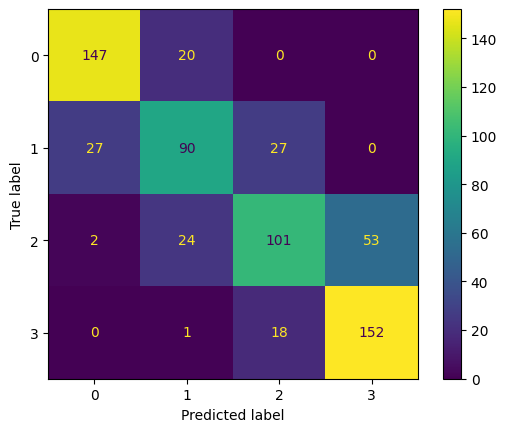

[['Logistic Regression', 0.9682779456193353],
 ['Logistic Regression Tuning', 0.974320241691843],
 ['Decision Tree Classifier', 0.8308157099697885],
 ['Decision Tree Classifier With Tuning', 0.7688821752265861],
 ['Random Forest Classifier', 0.9033232628398792],
 ['Random Forests Classifier With Tuning', 0.9199395770392749],
 ['Support Vector Classifier', 0.8867069486404834],
 ['SVC With Tuning', 0.9712990936555891],
 ['KNeighbors Classifier', 0.6404833836858006],
 ['KNN With Tuning', 0.7673716012084593],
 ['Gradient Boosting Classifier', 0.8972809667673716],
 ['Gradient Boosting With Tuning', 0.904833836858006],
 ['Ada Boost Classifier', 0.5634441087613293],
 ['AdaBoost With Tuning', 0.7401812688821753]]

In [43]:
predictions=grid.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions,labels=grid.classes_)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, predictions))
print("\nConfusion Matrix Plot:\n")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=grid.classes_)
disp.plot()
plt.show()
accuracyList.append(['AdaBoost With Tuning',accuracy])
accuracyList 

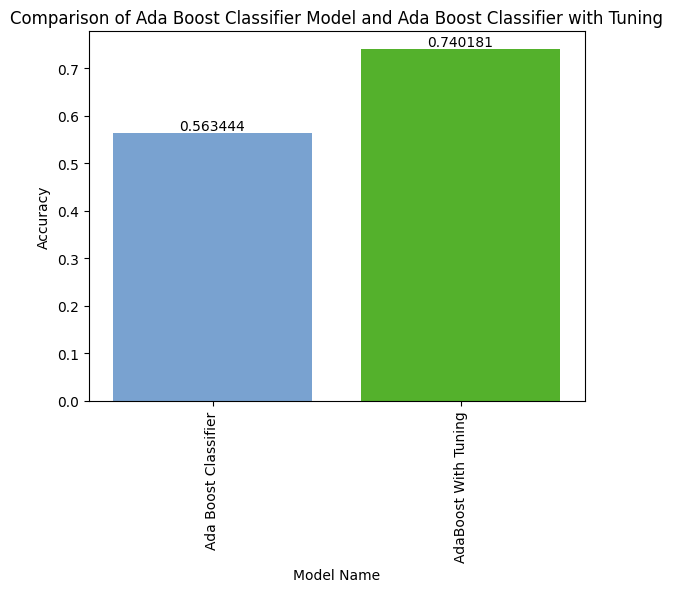

In [44]:
df=pd.DataFrame(accuracyList[12:14],columns=['Model Name','Accuracy'])
df=df.sort_values(by='Accuracy')
df
p=["#6aa2de","#4bc716"]
plt.title("Comparison of Ada Boost Classifier Model and Ada Boost Classifier with Tuning")
ax=sys.barplot(x=df['Model Name'],y=df['Accuracy'],palette =p)
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i, fontsize=10)

## Naive Bayes

Accuracy: 0.8006042296072508

Confusion Matrix:
 [[149  18   0   0]
 [ 18 101  25   0]
 [  0  30 129  21]
 [  0   1  19 151]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       167
           1       0.67      0.70      0.69       144
           2       0.75      0.72      0.73       180
           3       0.88      0.88      0.88       171

    accuracy                           0.80       662
   macro avg       0.80      0.80      0.80       662
weighted avg       0.80      0.80      0.80       662


Confusion Matrix Plot:



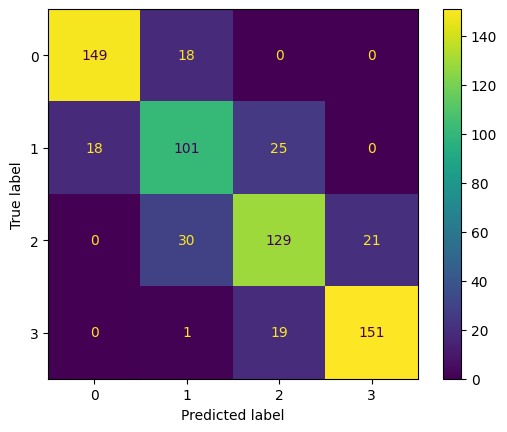

[['Logistic Regression', 0.9682779456193353],
 ['Logistic Regression Tuning', 0.974320241691843],
 ['Decision Tree Classifier', 0.8308157099697885],
 ['Decision Tree Classifier With Tuning', 0.7688821752265861],
 ['Random Forest Classifier', 0.9033232628398792],
 ['Random Forests Classifier With Tuning', 0.9199395770392749],
 ['Support Vector Classifier', 0.8867069486404834],
 ['SVC With Tuning', 0.9712990936555891],
 ['KNeighbors Classifier', 0.6404833836858006],
 ['KNN With Tuning', 0.7673716012084593],
 ['Gradient Boosting Classifier', 0.8972809667673716],
 ['Gradient Boosting With Tuning', 0.904833836858006],
 ['Ada Boost Classifier', 0.5634441087613293],
 ['AdaBoost With Tuning', 0.7401812688821753],
 ['Naive Bayes', 0.8006042296072508]]

In [45]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions,labels=model.classes_)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, predictions))
print("\nConfusion Matrix Plot:\n")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=model.classes_)
disp.plot()
plt.show()
accuracyList.append(['Naive Bayes',accuracy])
accuracyList 

### Naive Bayes with Tuning

In [46]:
param_grid = {'var_smoothing': [0.0000001,0.00001,0.0001,0.000001],
             }
grid=GridSearchCV(model,param_grid=param_grid,refit=True,cv=5,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...............var_smoothing=1e-07;, score=0.810 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-07;, score=0.818 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-07;, score=0.814 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-07;, score=0.755 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-07;, score=0.810 total time=   0.0s
[CV 1/5] END ...............var_smoothing=1e-05;, score=0.810 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-05;, score=0.818 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-05;, score=0.814 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-05;, score=0.755 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-05;, score=0.810 total time=   0.0s
[CV 1/5] END ..............var_smoothing=0.0001;, score=0.810 total time=   0.0s
[CV 2/5] END ..............var_smoothing=0.0001;,

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-07, 1e-05, 0.0001, 1e-06]},
             verbose=3)

In [47]:
grid.best_params_

{'var_smoothing': 1e-07}

Accuracy: 0.8006042296072508

Confusion Matrix:
 [[149  18   0   0]
 [ 18 101  25   0]
 [  0  30 129  21]
 [  0   1  19 151]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       167
           1       0.67      0.70      0.69       144
           2       0.75      0.72      0.73       180
           3       0.88      0.88      0.88       171

    accuracy                           0.80       662
   macro avg       0.80      0.80      0.80       662
weighted avg       0.80      0.80      0.80       662


Confusion Matrix Plot:



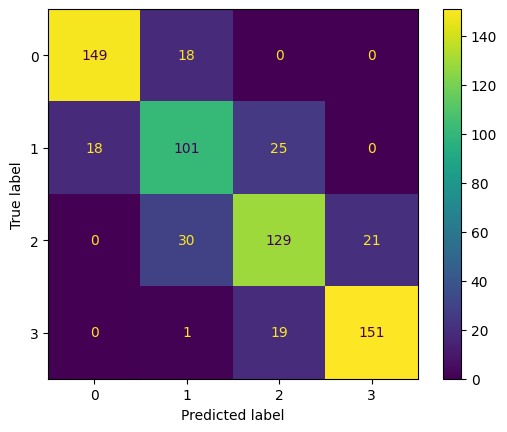

[['Logistic Regression', 0.9682779456193353],
 ['Logistic Regression Tuning', 0.974320241691843],
 ['Decision Tree Classifier', 0.8308157099697885],
 ['Decision Tree Classifier With Tuning', 0.7688821752265861],
 ['Random Forest Classifier', 0.9033232628398792],
 ['Random Forests Classifier With Tuning', 0.9199395770392749],
 ['Support Vector Classifier', 0.8867069486404834],
 ['SVC With Tuning', 0.9712990936555891],
 ['KNeighbors Classifier', 0.6404833836858006],
 ['KNN With Tuning', 0.7673716012084593],
 ['Gradient Boosting Classifier', 0.8972809667673716],
 ['Gradient Boosting With Tuning', 0.904833836858006],
 ['Ada Boost Classifier', 0.5634441087613293],
 ['AdaBoost With Tuning', 0.7401812688821753],
 ['Naive Bayes', 0.8006042296072508],
 ['Naive Bayes with Tuning', 0.8006042296072508]]

In [48]:
predictions=grid.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions,labels=grid.classes_)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, predictions))
print("\nConfusion Matrix Plot:\n")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=grid.classes_)
disp.plot()
plt.show()
accuracyList.append(['Naive Bayes with Tuning',accuracy])
accuracyList 

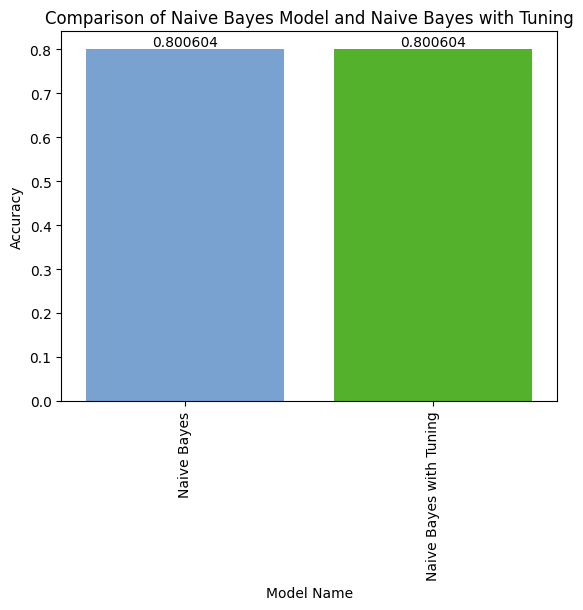

In [49]:
df=pd.DataFrame(accuracyList[14:16],columns=['Model Name','Accuracy'])
df=df.sort_values(by='Accuracy')
df
p=["#6aa2de","#4bc716"]
plt.title("Comparison of Naive Bayes Model and Naive Bayes with Tuning")
ax=sys.barplot(x=df['Model Name'],y=df['Accuracy'],palette =p)
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i, fontsize=10)

## Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = r2_score(y_test, predictions)
print("R2 Score:", accuracy)
accuracyList.append(['LinearRegression ',accuracy])
accuracyList 

R2 Score: 0.9135454397507509


[['Logistic Regression', 0.9682779456193353],
 ['Logistic Regression Tuning', 0.974320241691843],
 ['Decision Tree Classifier', 0.8308157099697885],
 ['Decision Tree Classifier With Tuning', 0.7688821752265861],
 ['Random Forest Classifier', 0.9033232628398792],
 ['Random Forests Classifier With Tuning', 0.9199395770392749],
 ['Support Vector Classifier', 0.8867069486404834],
 ['SVC With Tuning', 0.9712990936555891],
 ['KNeighbors Classifier', 0.6404833836858006],
 ['KNN With Tuning', 0.7673716012084593],
 ['Gradient Boosting Classifier', 0.8972809667673716],
 ['Gradient Boosting With Tuning', 0.904833836858006],
 ['Ada Boost Classifier', 0.5634441087613293],
 ['AdaBoost With Tuning', 0.7401812688821753],
 ['Naive Bayes', 0.8006042296072508],
 ['Naive Bayes with Tuning', 0.8006042296072508],
 ['LinearRegression ', 0.9135454397507509]]

# Accuracy Table

In [51]:
df=pd.DataFrame(accuracyList,columns=['Model Name','Accuracy'])
df=df.sort_values(by='Accuracy')
df

,Model Name,Accuracy
12,Ada Boost Classifier,0.563444
8,KNeighbors Classifier,0.640483
13,AdaBoost With Tuning,0.740181
9,KNN With Tuning,0.767372
3,Decision Tree Classifier With Tuning,0.768882
14,Naive Bayes,0.800604
15,Naive Bayes with Tuning,0.800604
2,Decision Tree Classifier,0.830816
6,Support Vector Classifier,0.886707
10,Gradient Boosting Classifier,0.897281


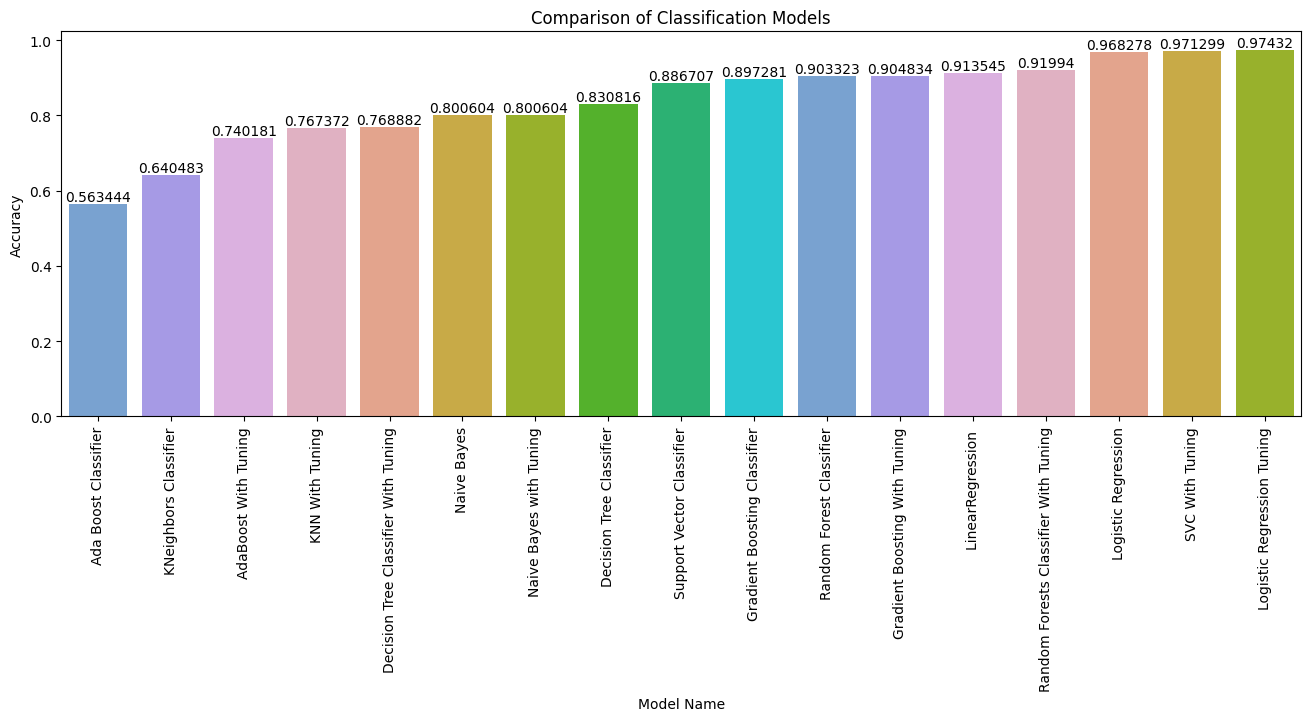

In [52]:
p=["#6aa2de","#9d8df2","#e1a9e8","#e8a9c0","#f29d7e","#deb531","#a6c716","#4bc716","#16c774","#0edeed"]
plt.figure(figsize=(16,5))
plt.title("Comparison of Classification Models")
ax=sys.barplot(x=df['Model Name'],y=df['Accuracy'],palette =p)
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i, fontsize=10)
